In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

In [2]:
# load data

df = pd.read_csv('../data/netflix_clean.csv')

In [3]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

In [4]:
# Movies vs tv shows quantity

content_trend = df.groupby(['year_added', 'type']).size().reset_index(name= 'count')

fig = px.bar(content_trend,
             x='year_added',
             y='count',
             color='type',
             title='Content Added by Year and Type')

fig.show()

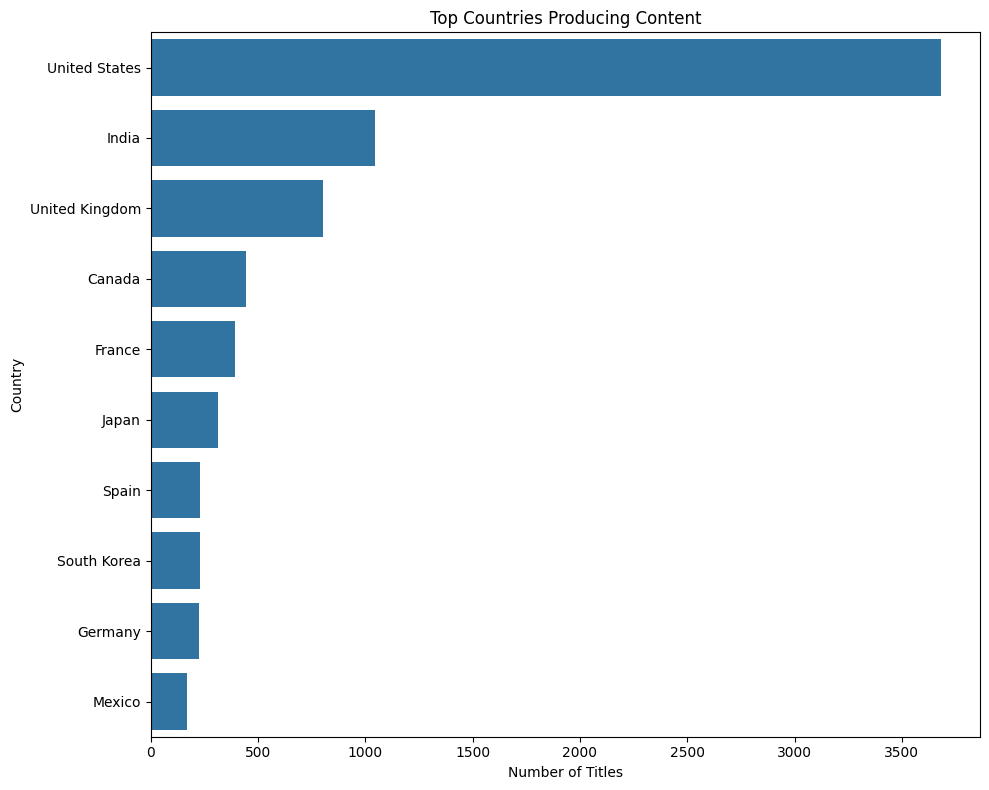

In [39]:
# Top Countries Producing Content

country_series = df['country'].str.split(', ')
country_list = [country for sublist in country_series for country in sublist]
country_list = list(filter(lambda x: x!= 'unknown', country_list))
top_countries = pd.Series(Counter(country_list)).nlargest(10)

plt.figure(figsize=(10, 8))

sns.barplot(x=top_countries.values,
            y=top_countries.index,)
plt.title('Top Countries Producing Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

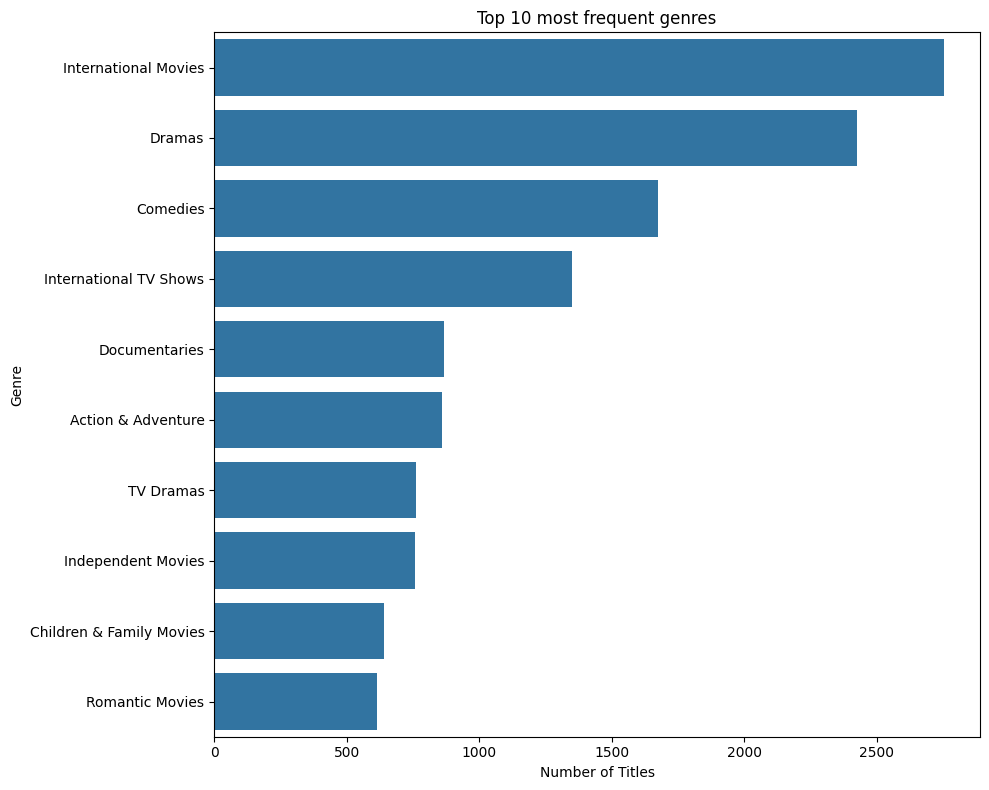

In [38]:
# Genre frequency

genre_series = df['listed_in'].str.split(', ')
genre_list = [genre for sublist in genre_series for genre in sublist]
genre_list = [genre.replace('[', '').replace(']', '').replace("'", '') for genre in genre_list]
top_genres = pd.Series(Counter(genre_list)).nlargest(10)

plt.figure(figsize=(10, 8))

sns.barplot(x=top_genres.values,
            y=top_genres.index,)
plt.title('Top 10 most frequent genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

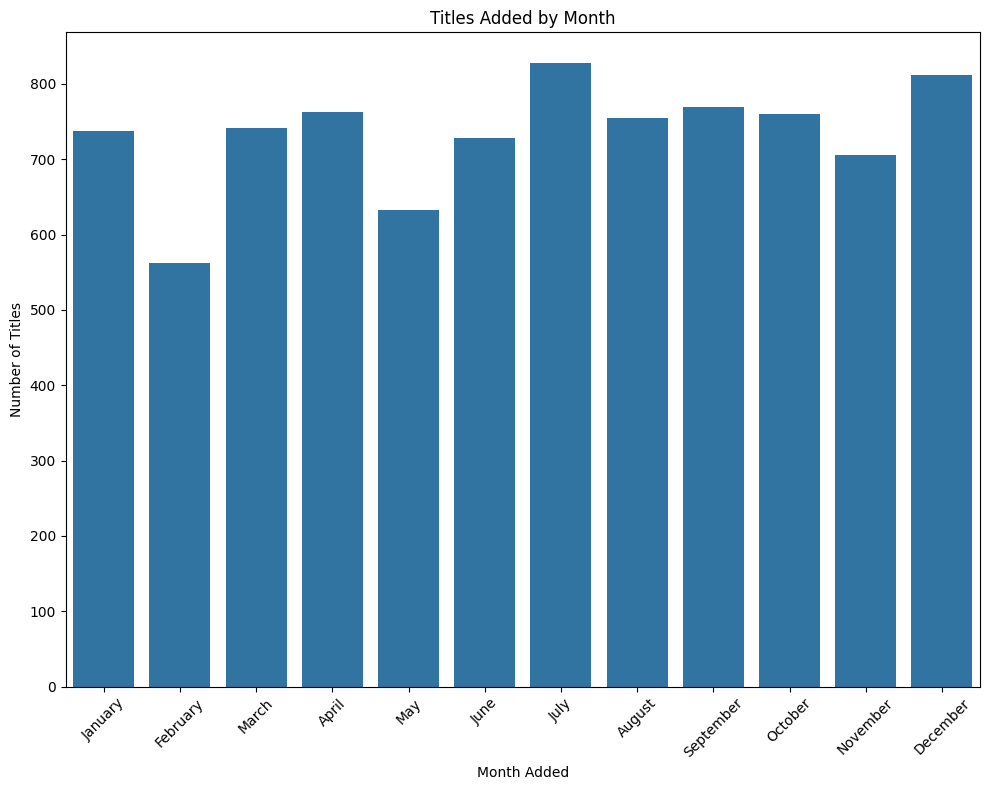

In [37]:
# Seasonal trend

month_order = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]

month_counts = df['month_added'].value_counts().reindex(month_order)

plt.figure(figsize=(10, 8))
sns.barplot(x=month_counts.index,
            y=month_counts.values)
plt.title('Titles Added by Month')
plt.ylabel('Number of Titles')
plt.xlabel('Month Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()